<a href="https://colab.research.google.com/github/Search-1/web/blob/main/Salary_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('Salary Data.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

print("\nDescriptive Statistics for All Columns:")
print(df.describe(include='all'))

First 5 rows of the dataset:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years

In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())

initial_rows = df.shape[0]
df.dropna(inplace=True)
rows_after_dropna = df.shape[0]

print(f"\nDataFrame shape before dropping NaNs: {initial_rows} rows")
print(f"DataFrame shape after dropping NaNs: {rows_after_dropna} rows")
print(f"{initial_rows - rows_after_dropna} rows were dropped.")

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

DataFrame shape before dropping NaNs: 375 rows
DataFrame shape after dropping NaNs: 373 rows
2 rows were dropped.

Missing values after handling:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())

initial_rows = df.shape[0]
df.dropna(inplace=True)
rows_after_dropna = df.shape[0]

print(f"\nDataFrame shape before dropping NaNs: {initial_rows} rows")
print(f"DataFrame shape after dropping NaNs: {rows_after_dropna} rows")
print(f"{initial_rows - rows_after_dropna} rows were dropped.")

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

DataFrame shape before dropping NaNs: 373 rows
DataFrame shape after dropping NaNs: 373 rows
0 rows were dropped.

Missing values after handling:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


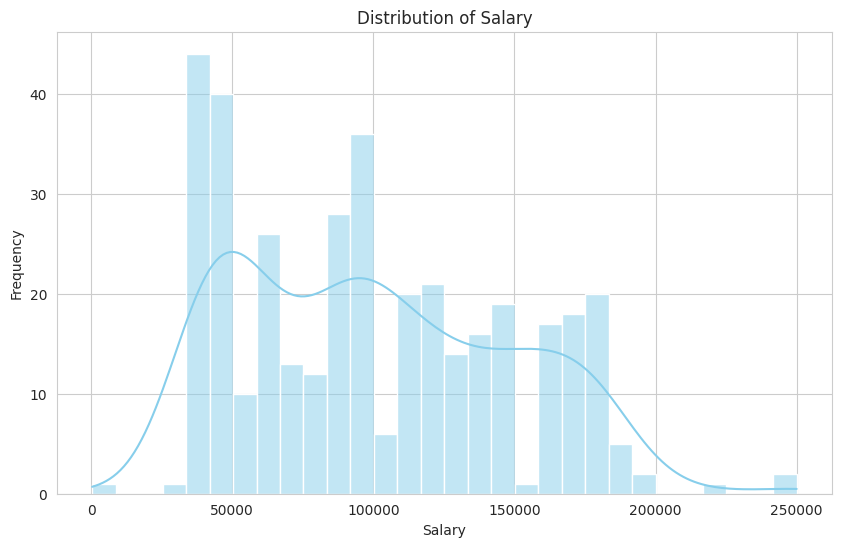

In [ ]:
plt.figure()
sns.histplot(df['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

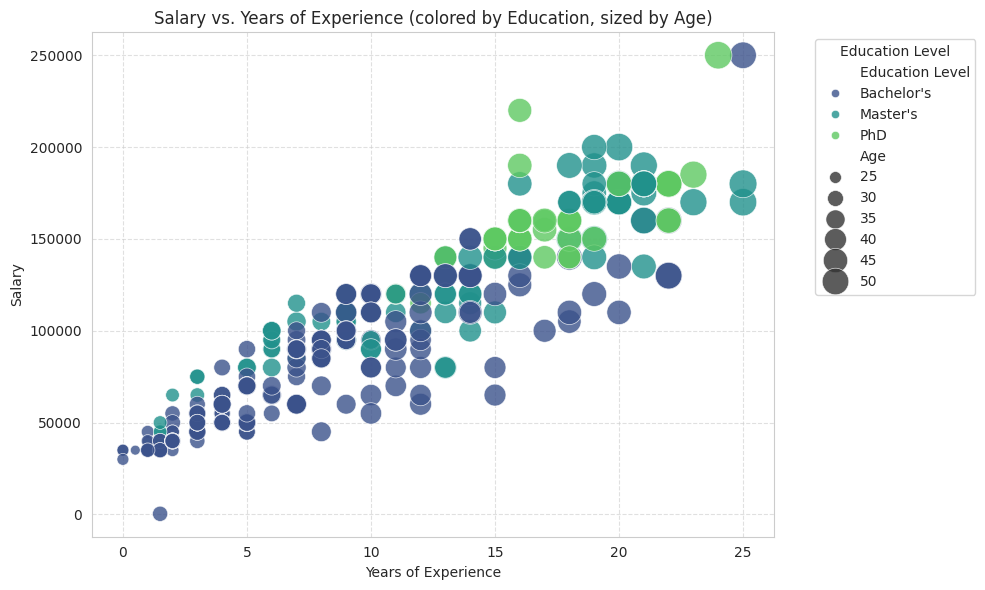

In [ ]:
plt.figure()
sns.scatterplot(x='Years of Experience', y='Salary', data=df,
                hue='Education Level', palette='viridis',
                size='Age', sizes=(50, 400), alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title('Salary vs. Years of Experience (colored by Education, sized by Age)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-609599564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Salary', data=df, order=education_order, palette='cividis')


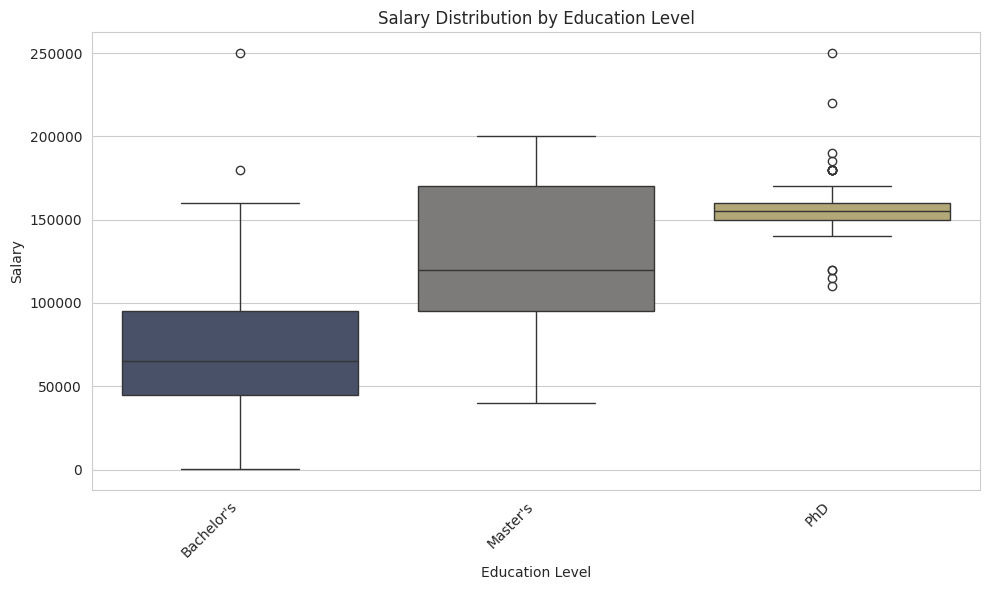

In [ ]:
plt.figure()
education_order = sorted(df['Education Level'].unique())
sns.boxplot(x='Education Level', y='Salary', data=df, order=education_order, palette='cividis')
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-9-1567389485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette='pastel')


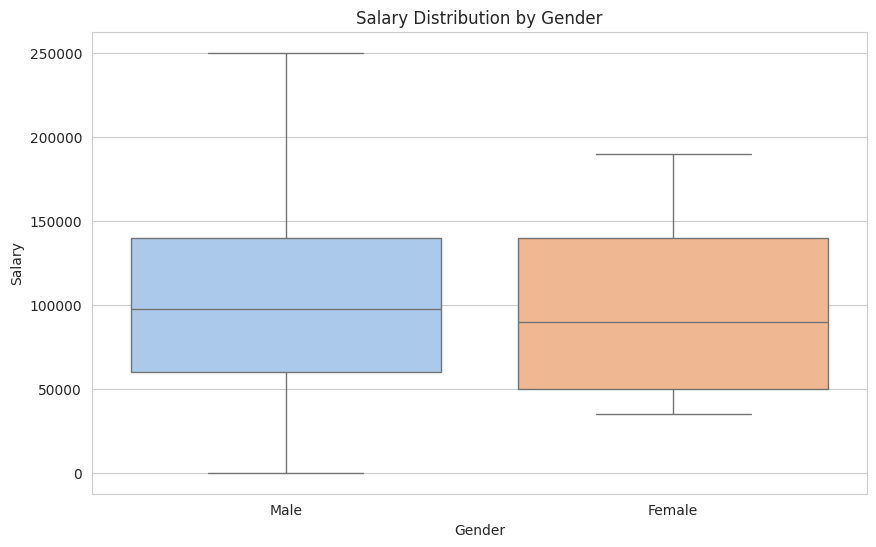

In [ ]:
plt.figure()
sns.boxplot(x='Gender', y='Salary', data=df, palette='pastel')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

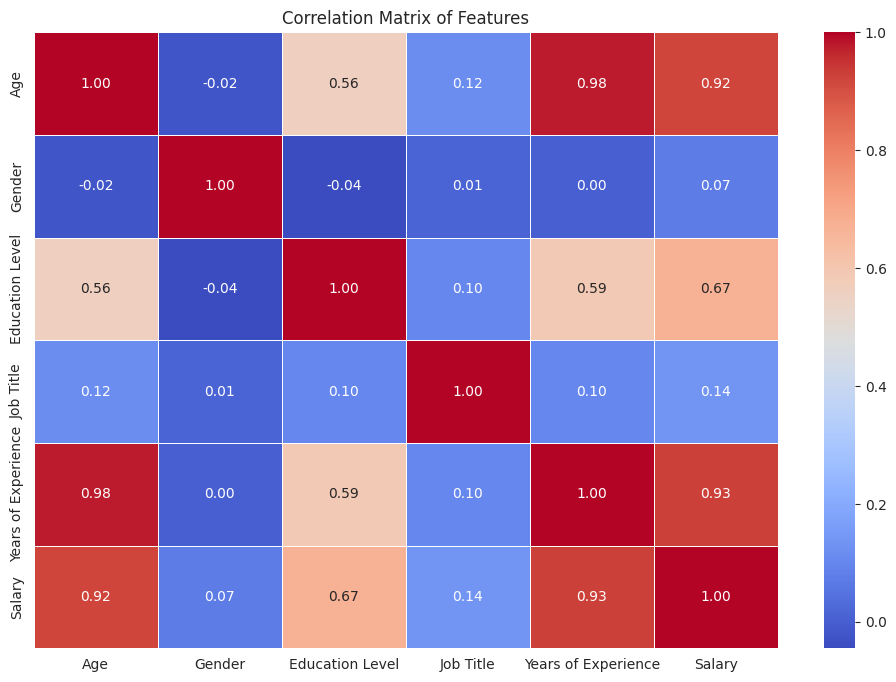

In [ ]:
df_encoded_for_corr = df.copy()

for column in df_encoded_for_corr.select_dtypes(include='object').columns:
    if column in df_encoded_for_corr.columns:
        le_temp = LabelEncoder()
        df_encoded_for_corr[column] = le_temp.fit_transform(df_encoded_for_corr[column])

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded_for_corr.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
le_gender = LabelEncoder()
le_education = LabelEncoder()
le_job = LabelEncoder()

if 'Gender' in df.columns:
    df['Gender'] = le_gender.fit_transform(df['Gender'])
if 'Education Level' in df.columns:
    df['Education Level'] = le_education.fit_transform(df['Education Level'])
if 'Job Title' in df.columns:
    df['Job Title'] = le_job.fit_transform(df['Job Title'])

print("DataFrame after Label Encoding:")
print(df.head())
print("\nData types after encoding:")
df.info()

DataFrame after Label Encoding:
    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0

Data types after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    int64  
 2   Education Level      373 non-null    int64  
 3   Job Title            373 non-null    int64  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null   

In [ ]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Years of Experience']

for col in numerical_cols:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

print("\nDataFrame after Feature Scaling:")
print(df.head())


DataFrame after Feature Scaling:
        Age  Gender  Education Level  Job Title  Years of Experience    Salary
0 -0.769398       1                0        159            -0.768276   90000.0
1 -1.336003       0                1         17            -1.073702   65000.0
2  1.072068       1                2        130             0.758859  150000.0
3 -0.202793       0                0        101            -0.462849   60000.0
4  2.063627       1                1         22             1.522426  200000.0


In [ ]:
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (298, 5)
X_test shape: (75, 5)
y_train shape: (298,)
y_test shape: (75,)



--- Linear Regression Model ---

Linear Regression Metrics:
R2 Score: 0.8961
Mean Absolute Error (MAE): 10928.92
Mean Squared Error (MSE): 249075656.43
Root Mean Squared Error (RMSE): 15782.13


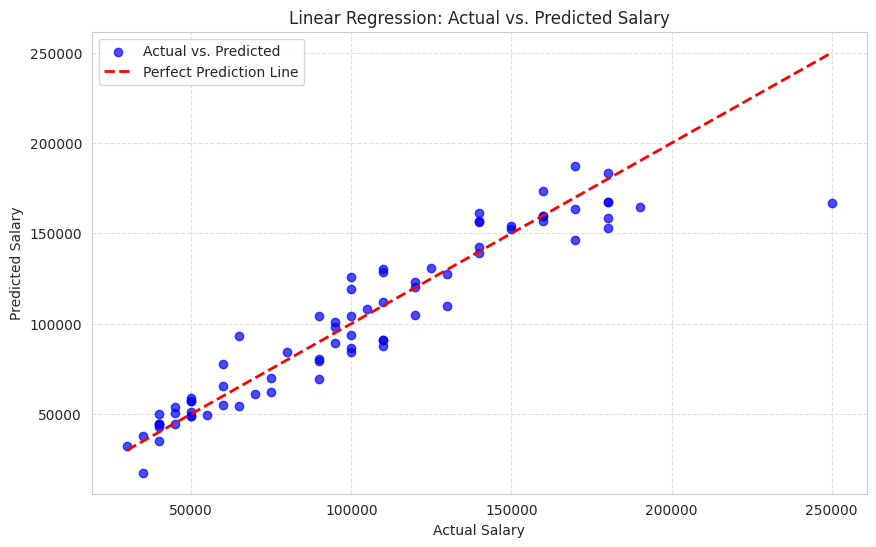

In [ ]:
print("\n--- Linear Regression Model ---")

y_train = y_train.astype(float)
y_test = y_test.astype(float)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("\nLinear Regression Metrics:")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

plt.figure()
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title('Linear Regression: Actual vs. Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- Decision Tree Regressor Model ---

Decision Tree Regressor Metrics:
R2 Score: 0.8896
Mean Absolute Error (MAE): 10400.00
Mean Squared Error (MSE): 264666666.67
Root Mean Squared Error (RMSE): 16268.58


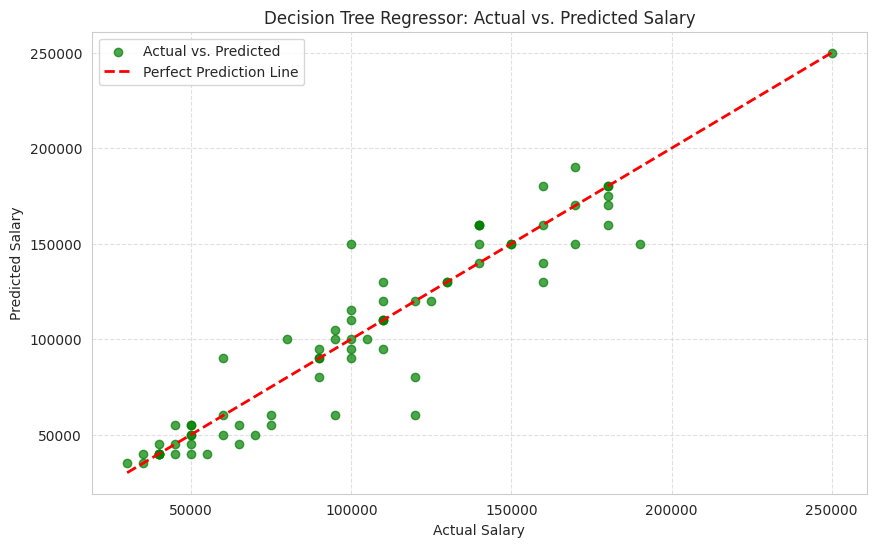

In [ ]:
print("\n--- Decision Tree Regressor Model ---")

y_train = y_train.astype(float)
y_test = y_test.astype(float)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

print("\nDecision Tree Regressor Metrics:")
print(f"R2 Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.2f}")

plt.figure()
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='green', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title('Decision Tree Regressor: Actual vs. Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- XGBoost Regressor Model ---

XGBoost Regressor Metrics:
R2 Score: 0.9311
Mean Absolute Error (MAE): 8730.20
Mean Squared Error (MSE): 165244273.60
Root Mean Squared Error (RMSE): 12854.74


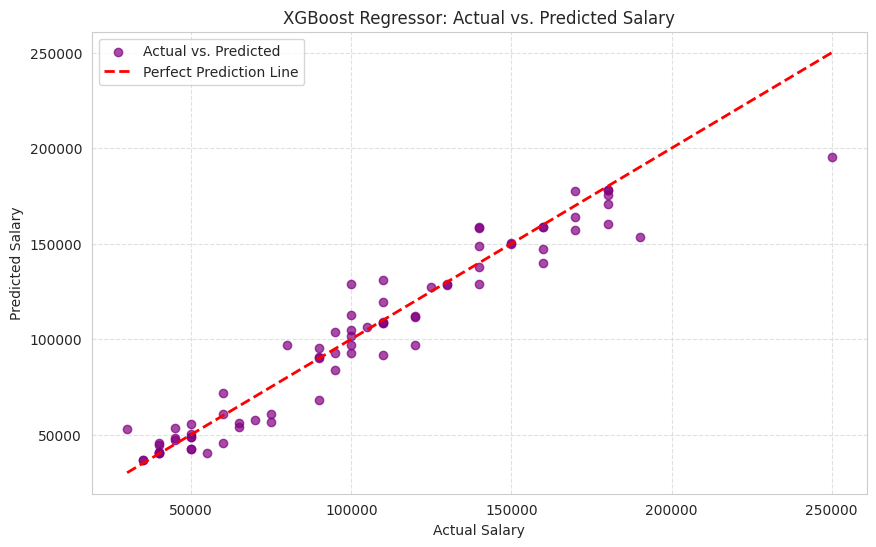

In [ ]:
print("\n--- XGBoost Regressor Model ---")

y_train = y_train.astype(float)
y_test = y_test.astype(float)

xgb_reg = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

print("\nXGBoost Regressor Metrics:")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")

plt.figure()
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='purple', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title('XGBoost Regressor: Actual vs. Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()